Задание_№1_загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
hr = pd.read_csv('HR.csv', sep=',')
hr.head()
#len(hr)
#hr.describe()
#hr.info()
#hr.columns


Задание_№2_Рассчитать: среднее, медиана, мода, мин/макс., среднее отклонение

In [ ]:
#Выбираем данные для статистики, организуем их по колонкам
hr_ms = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
#Создаем новую таблицу stat (статистика) с вычисдением необходимых параметров
stat = pd.DataFrame({'Mean' : hr_ms.mean(), 'Median' : hr_ms.median(), 'Min' : hr_ms.min(), 'Max' : hr_ms.max(), 'Std' : hr_ms.std()})
print(stat)

                            Mean  Median    Min    Max        Std
satisfaction_level      0.612834    0.64   0.09    1.0   0.248631
last_evaluation         0.716102    0.72   0.36    1.0   0.171169
number_project          3.803054    4.00   2.00    7.0   1.232592
average_montly_hours  201.050337  200.00  96.00  310.0  49.943099
time_spend_company      3.498233    3.00   2.00   10.0   1.460136


In [ ]:
hr_ms.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [ ]:
#т.к. параметр моды в столбце "average_montly_hours" имеет два значения, встроим в таблицу данные вручную, выбрав один из вариантов, находящийся ближе к медиане и среднему значению.
#создадим объект "Серия" и подставим его в статистическую таблицу stat_new рядом со столбцом "медиана", т. к. эти параметры близки.
s = pd.Series([0.1, 0.55, 4.0, 156,	3.0], 
              index=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])
stat_new = pd.DataFrame({'Mean': hr_ms.mean(), 'Median': hr_ms.median(), 
                         'Mode': s, 'Min': hr_ms.min(), 'Max': hr_ms.max(), 'Std': hr_ms.std()})
print(stat_new)
#stat_new.shape

                            Mean  Median    Mode    Min    Max        Std
satisfaction_level      0.612834    0.64    0.10   0.09    1.0   0.248631
last_evaluation         0.716102    0.72    0.55   0.36    1.0   0.171169
number_project          3.803054    4.00    4.00   2.00    7.0   1.232592
average_montly_hours  201.050337  200.00  156.00  96.00  310.0  49.943099
time_spend_company      3.498233    3.00    3.00   2.00   10.0   1.460136


Задание_№4_количество сотрудников по департаментам

In [ ]:
hr['department'].value_counts()


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Задание_№5_распределение сотрудников по зарплатам

In [ ]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Задание_№5_распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
hr[['department', 'salary']].value_counts()

department   salary
sales        low       2099
             medium    1772
technical    low       1372
             medium    1147
support      low       1146
             medium     942
IT           low        609
             medium     535
product_mng  low        451
marketing    low        402
product_mng  medium     383
marketing    medium     376
RandD        medium     372
             low        364
hr           medium     359
accounting   low        358
             medium     335
hr           low        335
sales        high       269
management   medium     225
             high       225
technical    high       201
management   low        180
support      high       141
IT           high        83
marketing    high        80
accounting   high        74
product_mng  high        68
RandD        high        51
hr           high        45
dtype: int64

Задание_№3_матрица корреляции

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
hr = pd.read_csv('HR.csv', sep=',')
#для расчета корреляционной матрицы всопльзуемся функцией "corr()"
#применяем ее только к столбцам с количественными переменными 
cvcorr = hr[['number_project', 'average_montly_hours', 'time_spend_company']].corr()
cvcorr.style.background_gradient(cmap='RdYlGn')

,number_project,average_montly_hours,time_spend_company
number_project,1.000000,0.417211,0.196786
average_montly_hours,0.417211,1.000000,0.127755
time_spend_company,0.196786,0.127755,1.000000


In [ ]:
#Чтобы найти наибольшее и наименьшее значения коэффициента корреляции создаем таблицу, в которой в качечтве данных идет подстановка с расчетом коэффициента корреляции с помощью функции "np.corrcoef",
#в каестве индекса - названия пар расчетных параметров, в качестве названия колонки  - "correlation" 
cc = pd.DataFrame(
    [np.corrcoef(hr['number_project'], hr['average_montly_hours'])[0][1],                   
    np.corrcoef(hr['average_montly_hours'], hr['time_spend_company'])[0][1],
    np.corrcoef(hr['number_project'], hr['time_spend_company'])[0][1]], 
              index = ['number_project_average_montly_hours', 
                      'average_montly_hours_time_spend_company', 
                      'number_project_time_spend_company'], 
              columns = ['correlation']).sort_values('correlation', ascending = False)
cc.style.background_gradient()

,correlation
number_project_average_montly_hours,0.417211
number_project_time_spend_company,0.196786
average_montly_hours_time_spend_company,0.127755


Задание_№7_проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени

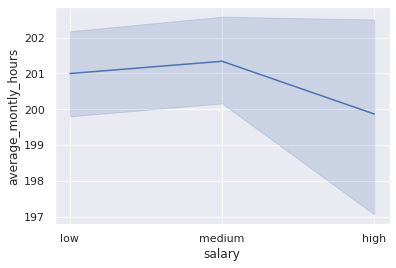

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
hr = pd.read_csv('HR.csv', sep=',')
#HO - нулевая гипотеза - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
sns.lineplot(data = hr, x = 'salary', y = 'average_montly_hours')
#Нулевая гипотеза неверна.

In [ ]:
#для расчета коэффициента корреляции переводим строки в числа
hr[['average_montly_hours', 'salary']]
y = hr['salary']
y_result = y.replace(to_replace = ['low', 'medium', 'high'], value = [1, 2, 3])
#рассчитаем теперь коэффициент 
print('Коэффициент корреляции: ', np.corrcoef(y_result, hr['average_montly_hours'])[0][1].round(5),
'Нулевая гипотеза неверна.')

Коэффициент корреляции:  -0.00224 Нулевая гипотеза неверна.


Задание_№8_рассчитать показатели среди уволившихся и неуволившихся сотрудников

In [ ]:
#доля сотрудников с повышением за последние 5 лет
#средняя степень удовлетворенности
#среднее количество проектов
hr.columns
df_left_nonleft = hr[['left', 'promotion_last_5years', 'satisfaction_level','number_project']]
df_left_nonleft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14999 non-null  int64  
 1   promotion_last_5years  14999 non-null  int64  
 2   satisfaction_level     14999 non-null  float64
 3   number_project         14999 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 468.8 KB


In [ ]:
#разеляем по двум таблицам - уволившиеся
df_left = df_left_nonleft[df_left_nonleft.left == 1]
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   3571 non-null   int64  
 1   promotion_last_5years  3571 non-null   int64  
 2   satisfaction_level     3571 non-null   float64
 3   number_project         3571 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 139.5 KB


In [ ]:
#разеляем по двум таблицам - неуволившиеся
df_nonleft = df_left_nonleft[df_left_nonleft.left == 0]
df_nonleft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 2000 to 14210
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   11428 non-null  int64  
 1   promotion_last_5years  11428 non-null  int64  
 2   satisfaction_level     11428 non-null  float64
 3   number_project         11428 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 446.4 KB


In [ ]:
#доля сотрудников с повышением за последние 5 лет среди уволившихся
z_1 = (df_left[df_left.promotion_last_5years == 1].promotion_last_5years.count() / 
       df_left[df_left.promotion_last_5years == 0].promotion_last_5years.count()) * 100 
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся -', z_1.round(2), '%')

Доля сотрудников с повышением за последние 5 лет среди уволившихся - 0.53 %


In [ ]:
#доля сотрудников с повышением за последние 5 лет среди среди неуволившихся

z_2 = (df_nonleft[df_nonleft.promotion_last_5years == 1].promotion_last_5years.count() / 
       df_nonleft[df_nonleft.promotion_last_5years == 0].promotion_last_5years.count()) * 100 
print('Доля сотрудников с повышением за последние 5 лет среди среди неуволившихся -', z_2.round(2), '%')

Доля сотрудников с повышением за последние 5 лет среди среди неуволившихся - 2.7 %


In [ ]:
#средняя степень удовлетворенности среди уволившихся
z_1_2 = df_left.satisfaction_level.mean().round(2)    
print('Cредняя степень удовлетворенности среди уволившихся', z_1_2)     

Cредняя степень удовлетворенности среди уволившихся 0.44


In [ ]:
#средняя степень удовлетворенности среди неуволившихся
z_2_2 = df_nonleft.satisfaction_level.mean().round(2)    
print('Cредняя степень удовлетворенности среди неуволившихся', z_2_2)  

Cредняя степень удовлетворенности среди неуволившихся 0.67


In [ ]:
#среднее количество проектов среди уволившихся
z_1_3 = df_left.number_project.mean().round(1)    
print('Cреднее количество проектов среди уволившихся', z_1_3)   

Cреднее количество проектов среди уволившихся 3.9


In [ ]:
#среднее количество проектов среди неуволившихся
z_2_3 = df_nonleft.number_project.mean().round(1)    
print('Cреднее количество проектов среди неуволившихся', z_2_3)   

Cреднее количество проектов среди неуволившихся 3.8


Задание_№9_построить модель LDA

In [ ]:
hr = pd.read_csv('HR.csv', sep=',')
hr.head()
#len(hr)
#hr.describe()
#hr.info()
#hr.columns

In [ ]:
data_hr = hr.drop(['department', 'salary'], axis = 1)

#data_hr['left_eval'] = data_hr['left'] - не нужно добалять столбец
data_hr.columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
x = data_hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = data_hr[['left']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
lr.fit(x_train, y_train)
lr.coef_
from sklearn.metrics import mean_squared_error

In [ ]:
z = pd.DataFrame([y_test.values.flatten(), lr.predict(x_test).round()]).T
z.columns = ['left', 'left_eval']
z.head()


In [ ]:
mean_squared_error(y_test.values.flatten(), lr.predict(x_test))

In [ ]:
mean_squared_error(y_train.values.flatten(), lr.predict(x_train))

In [ ]:
z = lr.predict(x_test).round()
z.groupby

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import k_means
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [ ]:
hr = pd.read_csv('HR.csv', sep=',')
hr.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
#Удаляем столбцы "Департамент" и "Зарплата"
data_hr = hr.drop(['department', 'salary'], axis = 1)
data_hr.head()


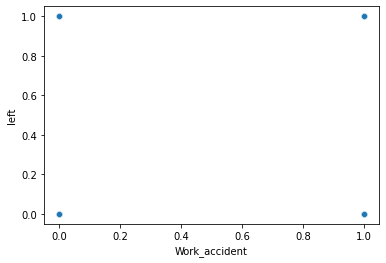

In [ ]:
sns.scatterplot(x = 'Work_accident',
                  y ='left',
                    data=data_hr)
